In [221]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [222]:
with open('../outputs/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

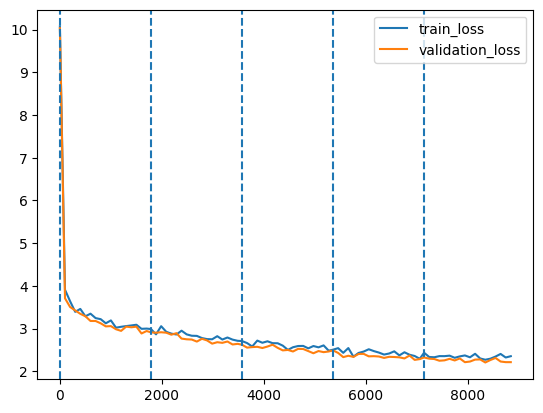

In [223]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

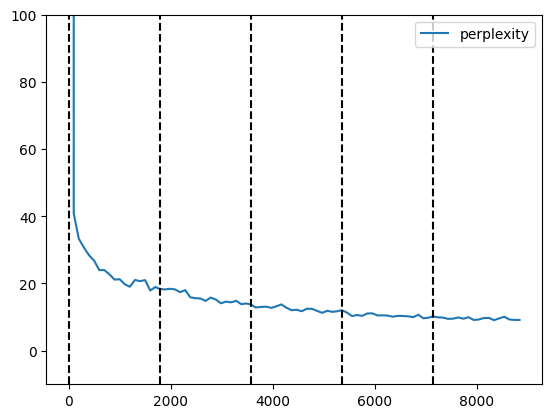

In [224]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

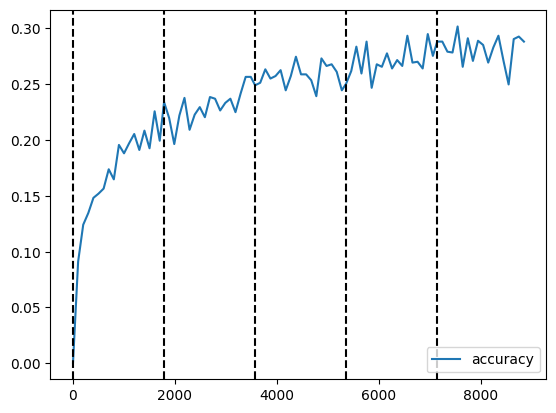

In [225]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [226]:
min([m['validation_loss'] for m in training_metrics])

2.2057998180389404

# Final Evaluation Outputs

In [229]:
food_names = np.load('../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [230]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [231]:
pd.set_option('max_colwidth', None)

In [232]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 

})

,input,mask_pos,label,prediction
0,"[gelatin, water, yogurt, <mask>, vanilla, cardamom, sweet orange, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[sugar, <pad>]","[sugar, gelatin]"
1,"[egg roll, sugar, pudding, sugar, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[6, 0]","[nut, <pad>]","[nut, egg roll]"
2,"[cracker, butter, sugar, flour, <mask>, water, cocoa powder, <mask>, salt, potato chip, marshmallow, <pad>, <pad>, <pad>, <pad>]","[4, 7]","[sauce, water]","[vanilla, vanilla]"
3,"[coffee, almond, curry powder, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[sugar substitute, <pad>]","[sugar, coffee]"
4,"[<mask>, <mask>, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, cheese, parsley, <pad>, <pad>, <pad>]","[0, 1]","[pie crust, spinach]","[pepper, pepper]"
...,...,...,...,...
995,"[meat bouillon, onion-family vegetable, green turtle, sauce, garlic, green bean, <mask>, cheese, tortilla, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[6, 0]","[rice, <pad>]","[cumin, meat bouillon]"
996,"[chicken, sauce, walnut, sweet orange, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[4, 0]","[<unknown>, <pad>]","[honey, chicken]"
997,"[<mask>, cream, buttermilk, honey, curry powder, water, salt, <mask>, butter, vanilla, domestic pig, butter, syrup, <pad>, <pad>]","[0, 7]","[egg, flour]","[flour, flour]"
998,"[spelt, flour, flour, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>, <pad>]","[2, 0]","[flour, butter]","[flour, butter]"
